# Exam Task


As an example of SVM and PCA in action, you will solve the facial recognition problem.
We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures 3,000 pixels each.
A fetcher for the dataset is built into Scikit-Learn:

In [1]:
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')
import numpy as np
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
print(faces.data.shape)
print(faces.target)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
(1348, 2914)
[1 3 3 ... 7 3 5]


1. Try to plot the faces from *faces.images* matrix and faces.target_names as labels. TIP: use **subplots** and **imshow** functions from matplotlib

2. Make pipeline of SVM and RandomizedPCA model using sklearn library (make_pipeline command).TIP: use nonlinear Gaussian kernel in SVM (**rbf**) and number of PCA components (try **50** and **150**).  

3. For the sake of testing our classifier output, you have to will split the data into a training and testing set. TIP: use **train_test_split function** from _sklearn.model_selection_

4. Perform a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel) in SVM, to find the best model. TIP: use **GridSearchCV** from _sklearn.model_selection_, use following values for 'svc__C': [1, 5, 10, 50] and 'svc__gamma: [0.0001, 0.0005, 0.001, 0.005]. Fit the training data to find out the parameters.

5. Print best parameters from grid search. If The optimal values fall  fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

6. Use best estimator (best_estimator_ function) from grid search to predict labels for test sample generated in 3). TIP: use **predict** function  

7. Use few test images to check the fit accuracy and plot images with estimator assigned labels like in 1).



Let's plot a few of these faces to see what we're working with:

Each image contains [62×47] or nearly 3,000 pixels.
We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis  to extract 150 fundamental components to feed into our support vector machine classifier.
We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline using make_pipeline function

##Exercise 1:
Try to plot the faces from *faces.images* matrix and faces.target_names as labels. TIP: use **subplots** and **imshow** functions from matplotlib

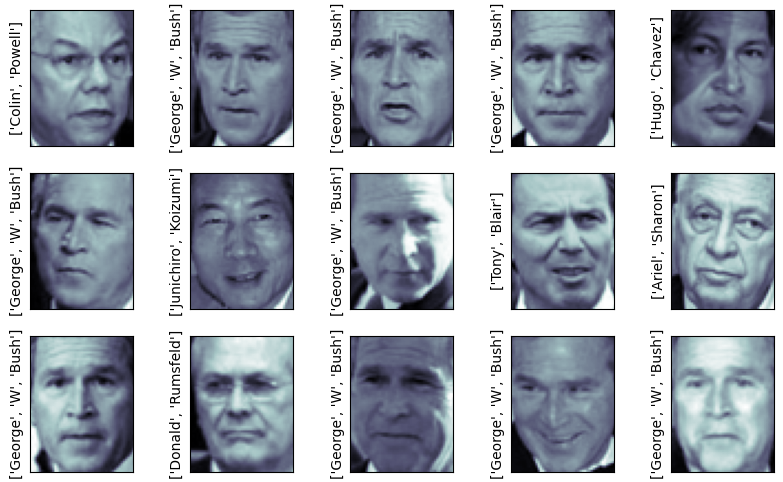

In [2]:
# We have put the full name
fig, ax = plt.subplots(3, 5,figsize=(10,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[faces.target[i]].split(), color = "black")

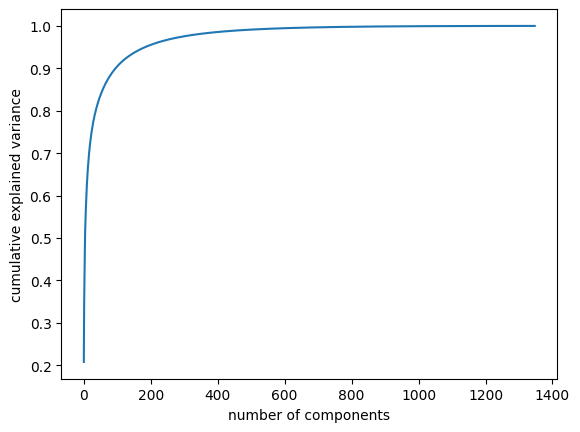

In [33]:
# We have made the curve in order to approximate the number of components to be used in the model.
pca = PCA().fit(faces.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

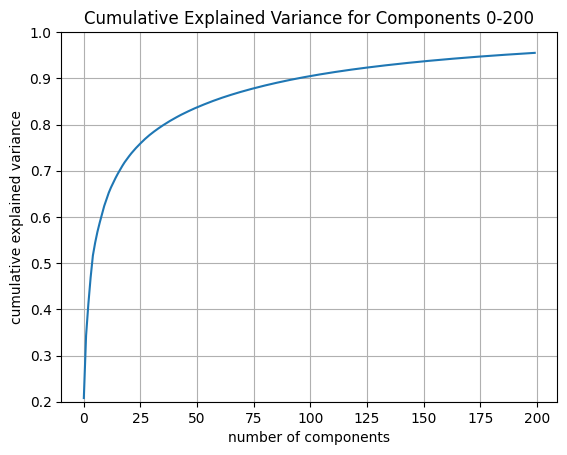

In [35]:
# We have reduced the range of the number of components between 0 and 200.
start_component = 0
end_component = 200

explained_variance_ratio_range = np.cumsum(pca.explained_variance_ratio_[start_component:end_component])

component_numbers = np.arange(start_component, end_component)

plt.plot(component_numbers, explained_variance_ratio_range)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative Explained Variance for Components {}-{}'.format(start_component, end_component))
plt.ylim(0.2, 1)
plt.grid()
plt.show()

In [50]:
np.random.seed(42)

# Since looking the graphic, we have considered that 120 components is the optimal value which we are getting a propper accuracy.
n_components_optimal = 120

# We make the PCA and SVM separately and then make the pipeline with make_pipeline.
part1 = PCA(n_components=n_components_optimal, whiten=True)
part2 = SVC(kernel='rbf', C=1.0, gamma='scale')
model = make_pipeline(part1, part2)

# We split the data into train and test (75, 25)
X_train, X_test, y_train, y_test = train_test_split(
    faces.data, faces.target, test_size=0.3)

# We do the grid search by testing with the parameters provided in the exercise.
# When we have obtained results close to the edges we have enlarged the values of the edges.
# Then, we have printed th ebeste parameters from the grid search.
param_grid = {'svc__C': [1, 5, 10, 50, 75, 100, 125, 150],
              'svc__gamma': [0.0005, 0.001, 0.005, 0.01, 0.015]}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Get the best estimator found during the grid search
best_estimator = grid_search.best_estimator_

# Using the best estimator for predicting labels in the test set
y_pred = best_estimator.predict(X_test)

# We have created a subset of test images and labels for visualisation.
sample_images = X_test[:15]
sample_labels = y_pred[:15]

Best Parameters: {'svc__C': 5, 'svc__gamma': 0.005}



Accuracy on sample set: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.50      0.67         2
           3       0.90      1.00      0.95         9
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2

    accuracy                           0.93        15
   macro avg       0.98      0.90      0.92        15
weighted avg       0.94      0.93      0.92        15



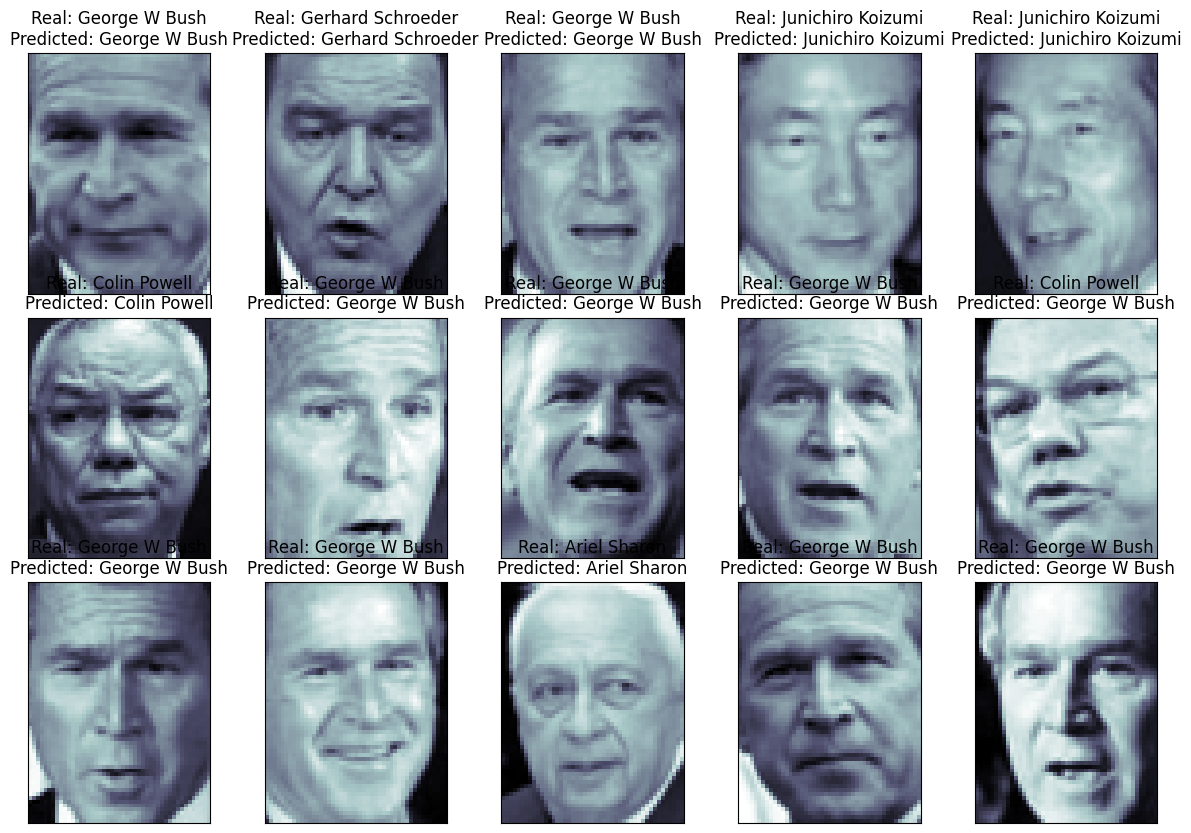

In [55]:
# We calculate the overall accuracy on the sample set.
y_true = y_test[:15]
accuracy = accuracy_score(y_true, sample_labels)
print(f"\nAccuracy on sample set: {accuracy:.2f}\n")

# We calculate the accuracy per class
class_accuracy = classification_report(y_true, sample_labels)
print("Classification Report:")
print(class_accuracy)

# Showing images with real and model-predicted labels in the sample set.
fig, ax = plt.subplots(3, 5, figsize=(15, 10),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, axi in enumerate(ax.flat):
    image = sample_images[i].reshape(faces.images.shape[1], faces.images.shape[2])
    true_label = faces.target_names[y_true[i]]  # Real label
    predicted_label = faces.target_names[sample_labels[i]]  # Label predicted by the model

    axi.imshow(image, cmap='bone')
    axi.set_title(f'Real: {true_label}\nPredicted: {predicted_label}')

plt.show()

# We took 15 images from the test set and extracted the actual and predicted labels for each of them.
# For the set of 15 images the accuracy obtained is 93%.


Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.82      0.82      0.82        17
     Colin Powell       0.80      0.88      0.84        84
  Donald Rumsfeld       0.74      0.81      0.77        36
    George W Bush       0.84      0.91      0.88       146
Gerhard Schroeder       0.91      0.71      0.80        28
      Hugo Chavez       1.00      0.63      0.77        27
Junichiro Koizumi       1.00      0.81      0.90        16
       Tony Blair       0.85      0.76      0.80        51

         accuracy                           0.84       405
        macro avg       0.87      0.79      0.82       405
     weighted avg       0.84      0.84      0.84       405



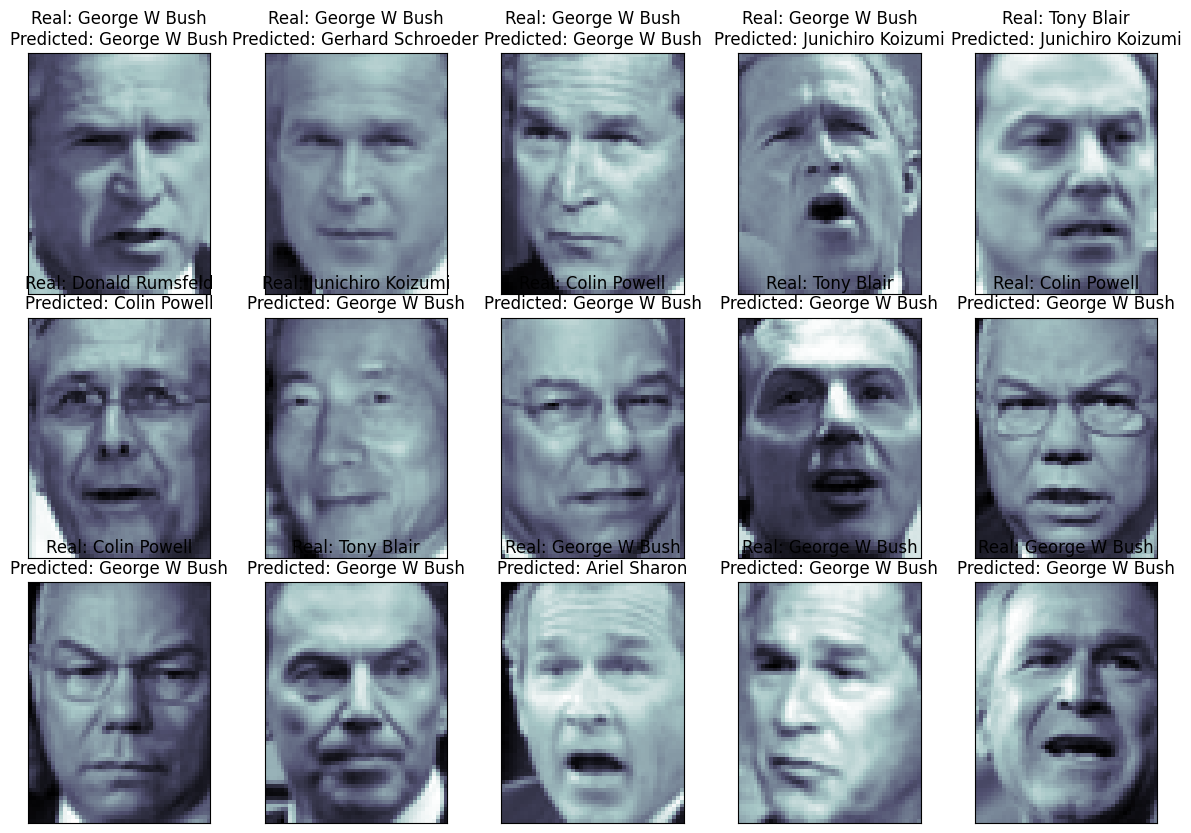

In [46]:
# We calculate the accuracy per class
# We can see that the total accuracy should be improved in the complete dataset, mainly in the Donald Rumsfeld pictures.
class_accuracy = classification_report(y_test, y_pred, target_names=faces.target_names)

print("Classification Report:")
print(class_accuracy)
